In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2
from google.colab.patches import cv2_imshow  #cv2.imshow() will crash co-lab runtime

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
type(xtrain)

numpy.ndarray

In [ ]:
cv2_imshow(xtrain[10,:,:])

In [ ]:
ytrain[100]

5

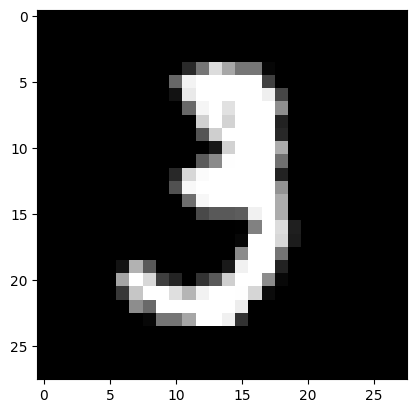

In [ ]:
plt.imshow(xtrain[10,:,:],cmap='gray')

In [ ]:
xtrain[100,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  18,  46, 136, 136, 244, 255, 241, 103,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  94,
        163, 253, 253, 253, 253, 238, 218, 204,  35,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 253,
        253, 253, 253, 237, 200,  57,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 246, 253,
        247, 108,  65,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207, 253, 253,
        230,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 157, 253, 253,
        125,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 250,
         57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 231, 249,
         34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 225, 253,
        231, 213, 213, 123,  16,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 172, 253,
        253, 253, 253, 253, 190,  63,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 116,
         72, 124, 209, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  25, 219, 253, 206,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 104, 246, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 213, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  26, 226, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
ytest[:3]

array([7, 2, 1], dtype=uint8)

In [ ]:
ytrain[:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
28*28

784

In [ ]:
yts=pd.DataFrame(ytest)
yts[0].value_counts()

0
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

In [ ]:
ytr=pd.DataFrame(ytrain)
ytr[0].value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

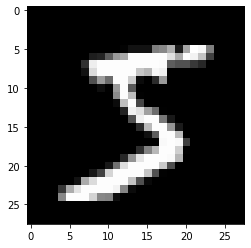

In [ ]:
plt.imshow(xtrain[0,:,:],cmap='gray')

In [ ]:
xtrain[0,5:10,5:10]

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,  30,  36],
       [  0,   0,  49, 238, 253],
       [  0,   0,  18, 219, 253],
       [  0,   0,   0,  80, 156]], dtype=uint8)

In [ ]:
ytrain[:4]

array([5, 0, 4, 1], dtype=uint8)

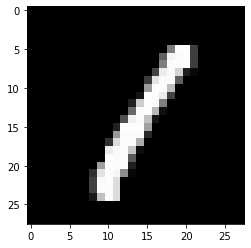

In [ ]:
plt.imshow(xtrain[3,:,:],cmap='gray')

In [ ]:
ytrain[:4]

array([5, 0, 4, 1], dtype=uint8)

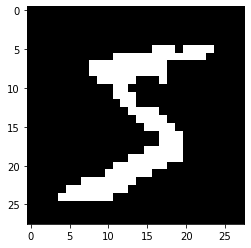

In [ ]:
plt.imshow(R1[0,:,:],cmap='gray')

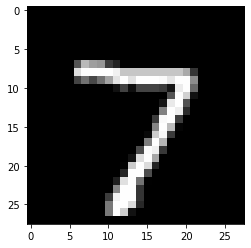

In [ ]:
plt.imshow(xtest[0,:,:],cmap='gray')

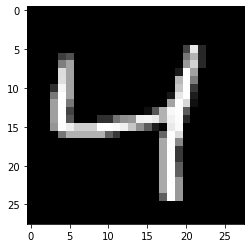

In [ ]:
plt.imshow(xtrain[2,:,:],cmap='gray')

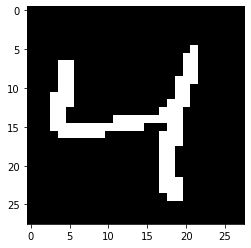

In [ ]:
plt.imshow(R1[2,:,:],cmap='gray')

In [ ]:
!pip install cv2

In [6]:
_,R1=cv2.threshold(xtrain,100,255,cv2.THRESH_BINARY)

In [7]:
_,R2=cv2.threshold(xtest,100,255,cv2.THRESH_BINARY)

In [ ]:
R1.shape,R2.shape

((60000, 28, 28), (10000, 28, 28))

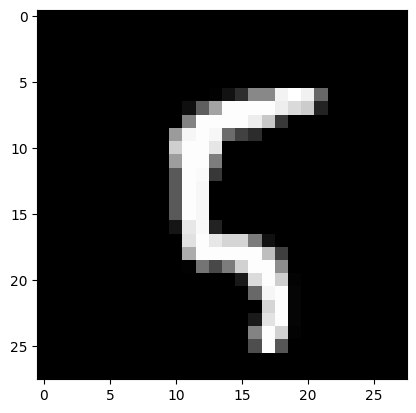

In [ ]:
plt.imshow(xtrain[100,:,:],cmap='gray')

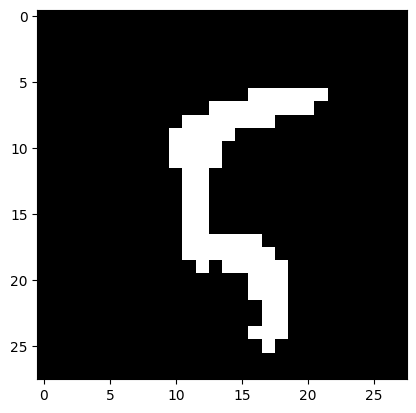

In [ ]:
plt.imshow(R1[100,:,:],cmap='gray')

In [ ]:
R1[100,:,:]/255

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1

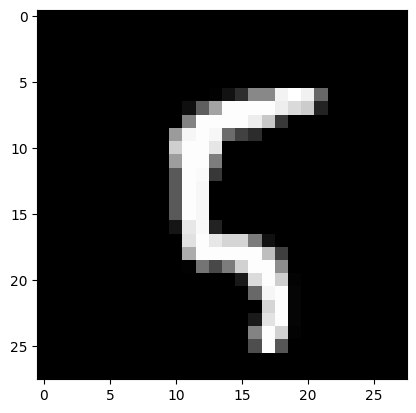

In [ ]:
plt.imshow(xtrain[100,:,:],cmap='gray')

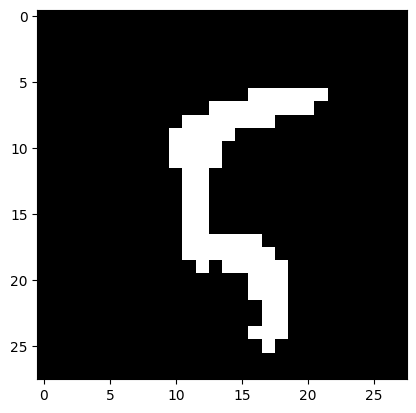

In [ ]:
plt.imshow(R1[100,:,:],cmap='gray')

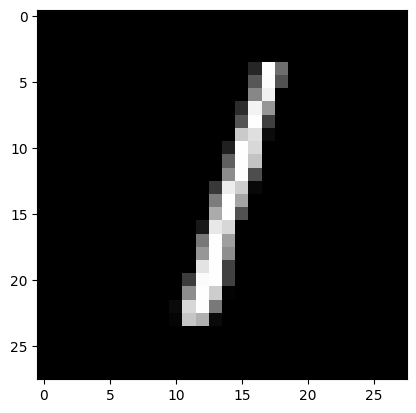

In [ ]:
plt.imshow(xtest[2,:,:],cmap='gray')

In [ ]:
L=pd.DataFrame(ytest)
L[0].value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 0, dtype: int64

In [8]:
x_train=R1.reshape(R1.shape[0],784).astype('float32')
x_test=R2.reshape(R2.shape[0],784).astype('float32')

In [ ]:
R1.shape

(60000, 28, 28)

In [ ]:
x_train.shape

(60000, 784)

In [9]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [10]:
# x_train=x_train/255 (highest gray level in any image is 255(white))
x_train/=255

In [ ]:
x_train[400,100:150]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
      dtype=float32)

In [11]:
x_test/=255

In [ ]:
x_test[400,100:150]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 255.,   0., 255., 255., 255., 255., 255.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression  # to compare ANN model with a Linear Model
from sklearn import metrics
LR=LogisticRegression()

In [ ]:
LR.fit(x_train,ytrain)

LogisticRegression()

In [ ]:
LR_predict=LR.predict(x_test)

In [ ]:
LR_cm=metrics.confusion_matrix(ytest,LR_predict)
print(LR_cm)

[[ 955    0    1    1    0   12    7    3    1    0]
 [   0 1111    4    2    0    2    4    1   11    0]
 [   6    8  922   20    9    5   15    6   37    4]
 [   4    0   21  916    0   26    2   13   19    9]
 [   1    2    8    5  911    0    8    2    8   37]
 [  10    3    5   45   11  771   13    4   28    2]
 [   9    2    8    1   10   15  907    3    3    0]
 [   3    9   23    6    5    3    0  938    5   36]
 [   5   11    8   23    9   34   12    9  851   12]
 [   9    5    1   10   39    9    1   25    6  904]]


In [ ]:
LR_cr=metrics.classification_report(ytest,LR_predict)
print(LR_cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.88      0.86      0.87       892
           6       0.94      0.95      0.94       958
           7       0.93      0.91      0.92      1028
           8       0.88      0.87      0.88       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [12]:
#Build ANN Model using TF-Keras framework
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

In [ ]:
ytrain[100]

5

In [13]:
#Encoding the output class label (One-Hot Encoding)
y_train=to_categorical(ytrain,10)
y_test=to_categorical(ytest,10)

In [ ]:
y_train[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
from keras import backend as K

In [15]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
def get_recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return recall

In [16]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(784,)))
model.add(Dense(60,activation='relu'))
#model.add(Dropout(.1))
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,batch_size=200,epochs=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
300/300 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.3187 - val_accuracy: 0.9665
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.2691 - val_accuracy: 0.9682
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.2915 - val_accuracy: 0.9647
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.2583 - val_accuracy: 0.9693
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 3.6425e-04 - accuracy: 0.9999 - val_loss: 0.2843 - val_accuracy: 0.9680
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.2758 - val_accuracy: 0.9707
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.9944 - val_loss: 0.2888 - val_accuracy: 0.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
model.save('/content/drive/My Drive/DL/MNIST_Rawpixel_trained.h5')

In [23]:
from tensorflow import keras

In [36]:
MNIST_trained_model_best=keras.models.load_model('/content/drive/My Drive/DL/MNIST_Rawpixel_trained_best.h5')

In [37]:
MNIST_trained_model_best.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 60)                3060      
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
Total params: 46580 (181.95 KB)
Trainable params: 46580 (181.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [35]:
# Save the model
checkpoint = ModelCheckpoint("/content/drive/My Drive/DL/MNIST_Rawpixel_trained_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#an absolute change of less than min_delta , will count as no improvement (threshold value)
epochs=100
# Train the model
model.fit(x_train, y_train, epochs = epochs, validation_data=(x_test, y_test), callbacks = [checkpoint, early])

Epoch 1/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.1008 - accuracy: 0.9829
Epoch 1: val_accuracy improved from -inf to 0.96340, saving model to /content/drive/My Drive/DL/MNIST_Rawpixel_trained_best.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1007 - accuracy: 0.9829 - val_loss: 0.2711 - val_accuracy: 0.9634
Epoch 2/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.0329 - accuracy: 0.9911
Epoch 2: val_accuracy improved from 0.96340 to 0.96530, saving model to /content/drive/My Drive/DL/MNIST_Rawpixel_trained_best.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9912 - val_loss: 0.2293 - val_accuracy: 0.9653
Epoch 3/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9916
Epoch 3: val_accuracy did not improve from 0.96530
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0306 - accuracy: 0.9916 - val_loss: 0.2466 - val_accuracy: 0.9

Let us Test the Model in Production Environment

In [26]:
test_img=cv2.imread('/content/drive/My Drive/DL/digit_3.jpg')

In [27]:
test_img.shape

(640, 640, 3)

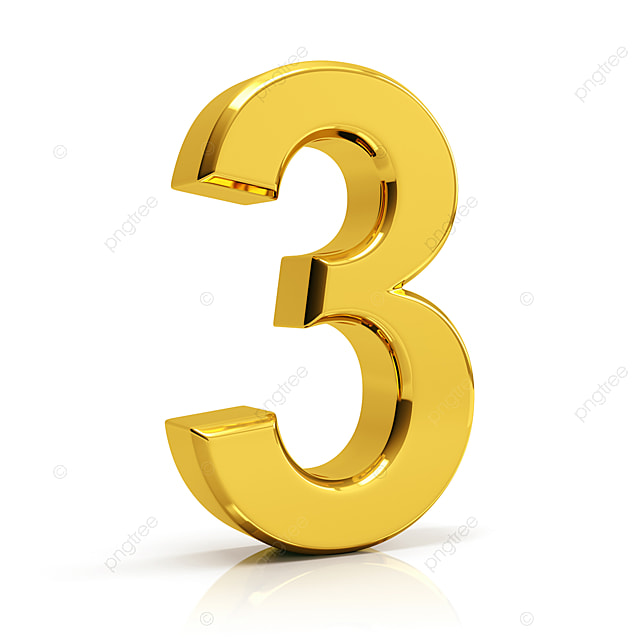

In [ ]:
#don't use cv2.imshow() in COLAB
cv2_imshow(test_img)

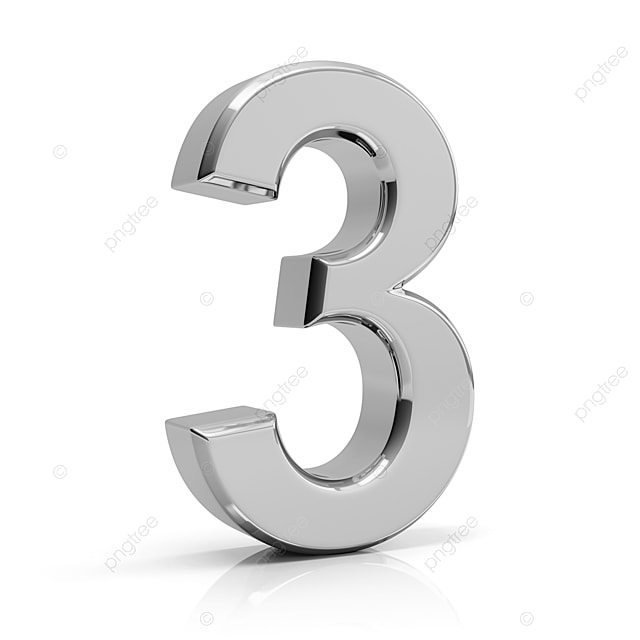

In [28]:
#If the image is read through plt.imread() cv2.COLOR_RGB2GRAY
bg=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(bg)

In [ ]:
bg.shape

(640, 640)

In [29]:
bg_resized=cv2.resize(bg,(28,28))
bg_resized.shape

(28, 28)

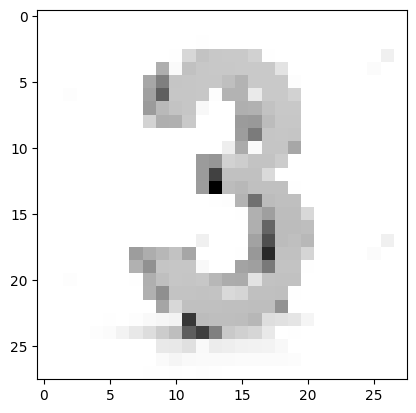

In [ ]:
plt.imshow(bg_resized,cmap='gray')

In [30]:
ret,K=cv2.threshold(bg_resized,230,255,cv2.THRESH_BINARY_INV)

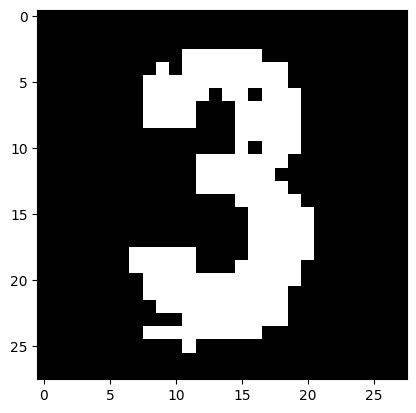

In [ ]:
plt.imshow(K,cmap='gray')

In [31]:
test_img_prod=K.reshape(1,784).astype('float32')

In [32]:
test_img_prod.shape

(1, 784)

In [ ]:
test_img_prod=test_img_prod/255

In [38]:
y_predict = MNIST_trained_model_best.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
np.argmax(y_predict[0])

7

In [39]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 962    1    1    1    4    1    4    2    2    2]
 [   0 1124    1    2    0    1    2    1    4    0]
 [   4    2  992    7    8    2    2   10    5    0]
 [   0    0    2  979    1    5    0    8    7    8]
 [   0    0    0    0  953    0    6    0    2   21]
 [   2    0    0   17    3  859    2    0    6    3]
 [   2    1    0    1    3   11  935    0    4    1]
 [   1    3    5    1    1    3    0 1007    3    4]
 [   0    3    2    7    5    8    0    6  935    8]
 [   2    2    0    4   10    4    0    6    7  974]]


In [40]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
np.argmax(model.predict(test_img_prod))

1/1 [==============================] - 0s 70ms/step


3

In [41]:
np.argmax(MNIST_trained_model_best.predict(test_img_prod))

1/1 [==============================] - 0s 21ms/step


3